The accuracy of the model is: 0.6366


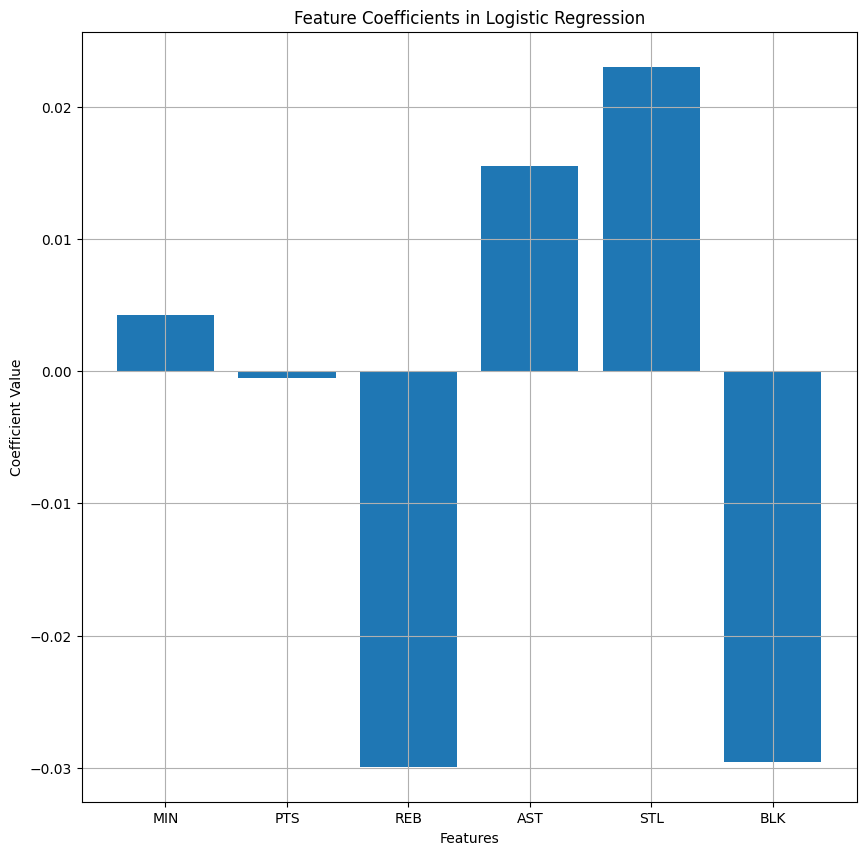

The accuracy of the model is: 0.5405


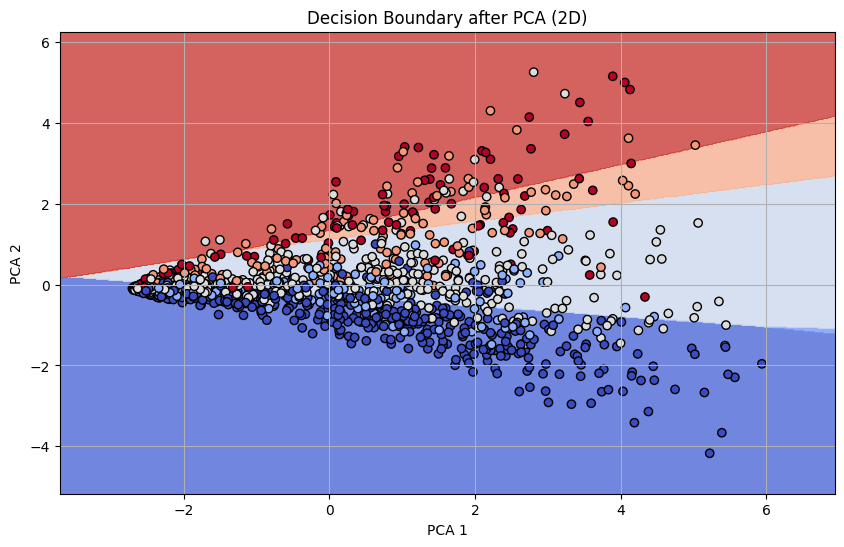

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split # to split training and testing
from sklearn.linear_model import LogisticRegression # To calculate the w value and bias
from sklearn.metrics import accuracy_score # Later to calculate prediction and accuracy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




season_stats = pd.read_csv("players_stats_by_season_with_position.csv")

# Set which one is input and which one is output
X = season_stats[[ 'MIN', "PTS", "REB", "AST", "STL", "BLK"]]
y = season_stats["position_number"].astype(str) 

# Set which one is the training and which one is the testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # All the input scales are different
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Now ask them to make model. Used saga because there is a lot of classes for input. Also used regularization
#lbfgs 
model = LogisticRegression(max_iter = 5000, solver= 'saga', penalty = 'elasticnet', l1_ratio=0.5, C=1.0)
model.fit(X_train, y_train)

# Prediction and Accuracy
y_prec = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prec)

print(f"The accuracy of the model is: {accuracy:.4f}")


# Making a model between coefficient value and features
coefficients = model.coef_[0]  # To make the graph 1d
feature_names = X.columns     

plt.figure(figsize=(10,10))
plt.bar(feature_names, coefficients)
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# 1. 데이터 불러오기
season_stats = pd.read_csv("players_stats_by_season_with_position.csv")


# 2. Input/Output 설정
X = season_stats[['MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK']]
y = season_stats['position_number'].astype(float)

# 3. 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA로 2D 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 6. 모델 학습
model = LogisticRegression(max_iter=5000, solver='saga', penalty='elasticnet', l1_ratio=0.5)
model.fit(X_train, y_train)

# 7. 예측 및 정확도
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy:.4f}")

# 8. Decision Boundary 그리기
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.astype(float), edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('Decision Boundary after PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

